In [1]:
import pandas as pd
from crossref.restful import Works

In [20]:
journal_title = 'The Journal of Industrial Economics'

In [43]:
works = Works()
query_result = works.query(container_title=journal_title).query(publisher_name='Wiley-Blackwell')

In [44]:
query_result.select(["DOI","container-title"])

In [53]:
#Select field's specified as (container_title) but must be one of: DOI, ISBN, ISSN, URL, abstract, accepted, alternative-id, approved, archive, article-number, assertion, author, chair, clinical-trial-number, container-title, content-created, content-domain, created, degree, deposited, editor, event, funder, group-title, indexed, is-referenced-by-count, issn-type, issue, issued, license, link, member, original-title, page, posted, prefix, published, published-online, published-print, publisher, publisher-location, reference, references-count, relation, score, short-container-title, short-title, standards-body, subject, subtitle, title, translator, type, update-policy, update-to, updated-by, volume
count = 0 
for item in query_result.sort("relevance").select(["DOI","container-title"]):
    count +=1 
    print(item,count)


KeyboardInterrupt: 

In [74]:
from crossref.restful import Journals
journals = Journals()
results = journals.works(issn="0022-1821")

In [83]:
journals.journal("0022-1821")

{'last-status-check-time': 1697941987377,
 'counts': {'current-dois': 121, 'backfile-dois': 1924, 'total-dois': 2045},
 'breakdowns': {'dois-by-issued-year': [[2003, 136],
   [2010, 46],
   [2023, 45],
   [2008, 44],
   [2009, 42],
   [1987, 42],
   [1984, 41],
   [2022, 39],
   [2021, 37],
   [2017, 37],
   [1985, 36],
   [2016, 35],
   [2013, 35],
   [2007, 35],
   [1981, 35],
   [2020, 34],
   [2018, 34],
   [1991, 34],
   [2011, 33],
   [1989, 33],
   [1992, 32],
   [1965, 32],
   [2015, 31],
   [2014, 31],
   [2004, 31],
   [1979, 31],
   [1973, 31],
   [2012, 30],
   [2005, 30],
   [1996, 30],
   [1994, 30],
   [1993, 30],
   [1988, 30],
   [1983, 30],
   [1980, 30],
   [1962, 30],
   [1982, 29],
   [1986, 28],
   [1978, 28],
   [2006, 26],
   [1990, 26],
   [1995, 25],
   [1971, 25],
   [1975, 24],
   [2019, 23],
   [1976, 23],
   [1977, 22],
   [1974, 22],
   [1972, 22],
   [1970, 22],
   [1969, 22],
   [1960, 22],
   [1967, 21],
   [1959, 20],
   [1957, 20],
   [1956, 20],
   

In [80]:
results.filter(from_pub_date = "2000").count()

868

In [167]:
authors_list = []
title_list = []
affiliations_list = []
published_dates_list=[]
journal_names_list=[]
subjects_list=[]
volumes_list=[]
issues_list=[]
URL_list=[]
DOI_list=[]
for item in results.filter(from_pub_date="2000").select(["container-title","author","DOI","URL",'subject','volume',"title",'issue',"published-online"]):
    authors = [f"{author.get('given', '')} {author.get('family', '')}" for author in item.get('author', [])]
    if len(authors) >0:
        authors_list.append('; '.join(authors))
        # Get the affiliations
        affiliations = [aff.get('name', '') for author in item.get('author', []) for aff in author.get('affiliation', [])]
        affiliations_list.append('; '.join(affiliations))
        title_list.append(item.get('title', '')[0])
        published_date = '-'.join(str(part) for part in item.get('published-online', {}).get('date-parts', [[]])[0])
        published_dates_list.append(published_date)
        journal_names_list.append(item.get('container-title', [''])[0])
        subjects_list.append('; '.join(item.get('subject', [])))
        volumes_list.append(item.get('volume', ''))
        issues_list.append(item.get('issue', ''))
        URL_list.append(item.get('URL',''))
        DOI_list.append(item.get('DOI',''))

In [163]:
for item in results.filter(from_pub_date="2000").select(["container-title","author","DOI","URL",'subject','volume',"title",'issue',"published-online"]).sample(100):
    print(item.get('title')[0])

Naked Exclusion in the Lab: The Case of Sequential Contracting
SPLINTERING AND INERTIA IN NETWORK INDUSTRIES<sup>*</sup>
Sincerest Form of Flattery? Product Innovation and Imitation in the European Automobile Industry
Asymmetric Cost Pass‐Through in Multi‐Unit Procurement Auctions: An Experimental Approach*


TypeError: 'NoneType' object is not subscriptable

In [143]:
len(published_dates_list)

83

In [168]:
data = {
        'Authors': authors_list,
        'Title' : title_list,
        'Affiliations': affiliations_list,
        'Published Date': published_dates_list,
        'Journal Name ': journal_names_list, 
        'Subjects': subjects_list,
        'Volume': volumes_list,
        'Issue': issues_list,
        'DOI': DOI_list,
        'URL': URL_list

    }
df = pd.DataFrame(data)
    
# Save the DataFrame to a CSV file
df.to_csv('publications.csv', index=True)

['2006-6',
 '',
 '2020-9',
 '',
 '2022-12',
 '2012-6',
 '',
 '2022-3',
 '',
 '2005-9',
 '2010-6',
 '2016-3',
 '2023-6',
 '2013-3',
 '2012-6',
 '2018-3',
 '2006-3',
 '2009-3',
 '2007-6',
 '2023-3',
 '2023-6',
 '2008-12',
 '',
 '2001-3',
 '2015-12',
 '',
 '2008-9',
 '',
 '2011-12',
 '2017-9',
 '2008-12',
 '2015-6',
 '2022-9',
 '2015-12',
 '',
 '2010-12',
 '2005-9',
 '2008-9',
 '2017-3',
 '2004-12',
 '2015-12',
 '2003-12',
 '2023-6',
 '2005-9',
 '2007-12',
 '2023-3',
 '2021-9',
 '2018-9',
 '2013-9',
 '2021-12',
 '2018-3',
 '2018-9',
 '',
 '2022-12',
 '2017-3',
 '2010-12',
 '2014-3',
 '2016-6',
 '2023-9',
 '2012-9',
 '2009-12',
 '2015-12',
 '2012-9',
 '2005-3',
 '2013-9',
 '2001-3',
 '2021-6',
 '2011-12',
 '2002-12',
 '2019-6',
 '2012-3',
 '',
 '2023-9',
 '',
 '2023-3',
 '',
 '2007-12',
 '2017-3',
 '2011-9',
 '',
 '2018-6',
 '',
 '',
 '2017-12']

In [169]:
df

,Authors,Title,Affiliations,Published Date,Journal Name,Subjects,Volume,Issue,DOI,URL
0,Alessandro Bonatti; Matthew Mitchell,"Introduction to the Symposium on Contracts, Or...",,2022-2-2,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",69,4,10.1111/joie.12281,http://dx.doi.org/10.1111/joie.12281
1,Ricardo Cabral; Michael J. Leiblein,Adoption of a Process Innovation with Learning...,,2003-3-27,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",49,3,10.1111/1467-6451.00149,http://dx.doi.org/10.1111/1467-6451.00149
2,David Bardey; Denis Gromb; David Martimort; Jé...,Controlling Sellers Who Provide Advice: Regula...,Department of Economics (CEDE) University of L...,2020-9-7,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68,3,10.1111/joie.12228,http://dx.doi.org/10.1111/joie.12228
3,Marius Schwartz; Daniel R. Vincent,Platform Competition With Cash‐Back Rebates Un...,Department of Economics Georgetown University ...,2020-7-29,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68,2,10.1111/joie.12210,http://dx.doi.org/10.1111/joie.12210
4,Paolo Buccirossi,A Search Model Where Consumers Choose Quantity...,,,Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",51,4,10.1111/j.0022-1821.2003.00208.x,http://dx.doi.org/10.1111/j.0022-1821.2003.002...
...,...,...,...,...,...,...,...,...,...,...
729,Yiyi Zhou; Shanjun Li,Technology Adoption and Critical Mass: The Cas...,Department of Economics and College of Busines...,2018-10-30,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",66,2,10.1111/joie.12176,http://dx.doi.org/10.1111/joie.12176
730,Daniel Bennett; Che‐Lun Hung; Tsai‐Ling Lauder...,Health Care Competition and Antibiotic Use in ...,Harris School of Public Policy Studies Univers...,2015-6-15,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",63,2,10.1111/joie.12075,http://dx.doi.org/10.1111/joie.12075
731,David Lucking-Reiley,Auctions on the Internet: What’s Being Auction...,,2003-3-27,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",48,3,10.1111/1467-6451.00122,http://dx.doi.org/10.1111/1467-6451.00122
732,Gaétan De Rassenfosse; Paul H. Jensen; T'Mir J...,Is the Patent System an Even Playing Field? Th...,Ecole Polytechnique Fédérale de Lausanne Laus...,2023-4-5,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",71,1,10.1111/joie.12319,http://dx.doi.org/10.1111/joie.12319


In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

def extract_author_info(url):
    driver = webdriver.Chrome()
    with open('stealth.min.js', "r") as f:
        js = f.read()
    
        driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
            "source": js
        })
    
    print("open")
    try:
        # 导航到URL
        driver.get(url)
        print("open success")
        time.sleep(10)
        
        
        # 获取网页源代码
        page_source = driver.page_source
        print(page_source)
        
        # 使用Beautiful Soup解析HTML
        soup = BeautifulSoup(page_source, 'html.parser')
        print(soup)
        
        # 查找和提取作者信息
        authors = soup.find_all(class_='author')
        for author in authors:
            name = author.find(class_='name')
            affiliation = author.find(class_='affiliation')
            if name and affiliation:
                print(f'{name.text}, {affiliation.text}')
    except:
        print('fail')
    finally:
        # 关闭WebDriver
        driver.quit()

# 示例使用：
url = 'http://dx.doi.org/10.1111/joie.12281'
extract_author_info(url)

open
open success
<html lang="en" class="pb-page" data-request-id="e386a94c-d23b-4c2a-9ce1-bd8d0bda9fa9"><head data-pb-dropzone="head"><style>:root{--litepicker-container-months-color-bg: #fff;--litepicker-container-months-box-shadow-color: #ddd;--litepicker-footer-color-bg: #fafafa;--litepicker-footer-box-shadow-color: #ddd;--litepicker-tooltip-color-bg: #fff;--litepicker-month-header-color: #333;--litepicker-button-prev-month-color: #9e9e9e;--litepicker-button-next-month-color: #9e9e9e;--litepicker-button-prev-month-color-hover: #2196f3;--litepicker-button-next-month-color-hover: #2196f3;--litepicker-month-width: calc(var(--litepicker-day-width) * 7);--litepicker-month-weekday-color: #9e9e9e;--litepicker-month-week-number-color: #9e9e9e;--litepicker-day-width: 38px;--litepicker-day-color: #333;--litepicker-day-color-hover: #2196f3;--litepicker-is-today-color: #f44336;--litepicker-is-in-range-color: #bbdefb;--litepicker-is-locked-color: #9e9e9e;--litepicker-is-start-color: #fff;--lite

In [ ]:
#formal


from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd 
import random

# 创建ChromeOptions对象
chrome_options = Options()

# 添加headless选项
chrome_options.add_argument("--headless")

df = pd.read_csv("publications.csv", index_col=0)
count = 0
total = len(df["URL"])
for URL in df["URL"]:
    url = URL
    driver = webdriver.Chrome(options=chrome_options)
    with open('stealth.min.js', "r") as f:
        js = f.read()
        
    driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
        "source": js
    })
        
    print("open")
    try:
        # 导航到URL
        driver.get(url)
        print("open success")
        random_wait_object = random.uniform(1,100)
        if count%100 == random_wait_object:
            random_wait_time = 60
        else:
            random_wait_time = random.uniform(5,10)
        
        time.sleep(random_wait_time)
            # 获取网页源代码
        page_source = driver.page_source
            
            # 使用Beautiful Soup解析HTML
        soup = BeautifulSoup(page_source, 'html.parser')
            
        # 查找和提取作者信息
        # 获取 citation_author
        authors = [meta['content'] for meta in soup.find_all('meta', {'name': 'citation_author'})]
        
        # 获取 citation_author_institution
        author_institutions = [meta['content'] for meta in soup.find_all('meta', {'name': 'citation_author_institution'})]
        
        # 获取 citation_publication_date
        publication_date = soup.find('meta', {'name': 'citation_publication_date'})['content'] if soup.find('meta', {'name': 'citation_publication_date'}) else None
        
        # 获取 citation_title
        title = soup.find('meta', {'name': 'citation_title'})['content'] if soup.find('meta', {'name': 'citation_title'}) else None
    except:
        print('fail')
    finally:
            # 关闭WebDriver
        driver.quit()
    
    
    
    authors_str = '; '.join(authors)
    author_institutions_str = '; '.join(author_institutions)
    # 查找要更新的行
    index = df[df['URL'] == url].index[0]
    # 更新行
    df.loc[index, 'Authors'] = authors_str
    df.loc[index, 'Affiliations'] = author_institutions_str
    df.loc[index, 'Published Date'] = publication_date
    df.loc[index, 'Title'] = title
    count += 1
    print(df.iloc[count-1])
    print('success',count,"/",total)
    
# 保存更新后的 CSV
df.to_csv('jouranl of industrial economics.csv',index=True)



In [22]:
df

,Authors,Title,Affiliations,Published Date,Journal Name,Subjects,Volume,Issue,DOI,URL
0,,None,,None,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",69.0,4,10.1111/joie.12281,http://dx.doi.org/10.1111/joie.12281
1,,None,,None,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",49.0,3,10.1111/1467-6451.00149,http://dx.doi.org/10.1111/1467-6451.00149
2,,None,,None,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68.0,3,10.1111/joie.12228,http://dx.doi.org/10.1111/joie.12228
3,,None,,None,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68.0,2,10.1111/joie.12210,http://dx.doi.org/10.1111/joie.12210
4,,None,,None,Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",51.0,4,10.1111/j.0022-1821.2003.00208.x,http://dx.doi.org/10.1111/j.0022-1821.2003.002...
...,...,...,...,...,...,...,...,...,...,...
729,Yiyi Zhou; Shanjun Li,Technology Adoption and Critical Mass: The Cas...,Department of Economics and College of Busines...,2018-10-30,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",66.0,2,10.1111/joie.12176,http://dx.doi.org/10.1111/joie.12176
730,Daniel Bennett; Che‐Lun Hung; Tsai‐Ling Lauder...,Health Care Competition and Antibiotic Use in ...,Harris School of Public Policy Studies Univers...,2015-6-15,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",63.0,2,10.1111/joie.12075,http://dx.doi.org/10.1111/joie.12075
731,David Lucking-Reiley,Auctions on the Internet: What’s Being Auction...,NaN,2003-3-27,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",48.0,3,10.1111/1467-6451.00122,http://dx.doi.org/10.1111/1467-6451.00122
732,Gaétan De Rassenfosse; Paul H. Jensen; T'Mir J...,Is the Patent System an Even Playing Field? Th...,Ecole Polytechnique Fédérale de Lausanne Laus...,2023-4-5,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",71.0,1,10.1111/joie.12319,http://dx.doi.org/10.1111/joie.12319


In [29]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

chrome_options = Options()
chrome_options.add_argument("--headless")

url = 'http://dx.doi.org/10.1111/joie.12281'

driver = webdriver.Chrome(options=chrome_options)
with open('stealth.min.js', "r") as f:
    js = f.read()
    
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": js
})
    
print("open")
try:
    # 导航到URL
    driver.get(url)
    print("open success")
    time.sleep(10)
        
        
        # 获取网页源代码
    page_source = driver.page_source
    print(page_source)
        
        # 使用Beautiful Soup解析HTML
    soup = BeautifulSoup(page_source, 'html.parser')
    print(soup)
        
        # 查找和提取作者信息
    authors = soup.find_all(class_='author')
    for author in authors:
        name = author.find(class_='name')
        affiliation = author.find(class_='affiliation')
        if name and affiliation:
            print(f'{name.text}, {affiliation.text}')
except:
    print('fail')
finally:
        # 关闭WebDriver
    driver.quit()

# 示例使用：



open
open success
<html lang="en" class="pb-page" data-request-id="63a5f43c-d910-4893-8cba-eb5e8daf52ee"><head data-pb-dropzone="head"><style>:root{--litepicker-container-months-color-bg: #fff;--litepicker-container-months-box-shadow-color: #ddd;--litepicker-footer-color-bg: #fafafa;--litepicker-footer-box-shadow-color: #ddd;--litepicker-tooltip-color-bg: #fff;--litepicker-month-header-color: #333;--litepicker-button-prev-month-color: #9e9e9e;--litepicker-button-next-month-color: #9e9e9e;--litepicker-button-prev-month-color-hover: #2196f3;--litepicker-button-next-month-color-hover: #2196f3;--litepicker-month-width: calc(var(--litepicker-day-width) * 7);--litepicker-month-weekday-color: #9e9e9e;--litepicker-month-week-number-color: #9e9e9e;--litepicker-day-width: 38px;--litepicker-day-color: #333;--litepicker-day-color-hover: #2196f3;--litepicker-is-today-color: #f44336;--litepicker-is-in-range-color: #bbdefb;--litepicker-is-locked-color: #9e9e9e;--litepicker-is-start-color: #fff;--lite

In [49]:
import cloudscraper
import pandas as pd
import random
import time
from bs4 import BeautifulSoup

# 创建cloudscraper对象
scraper = cloudscraper.create_scraper()

df = pd.read_csv("publications.csv", index_col=0)
count = 0
total = len(df["URL"])

for index, row in df.iterrows():
    url = row["URL"]
    affiliation = row["Affiliations"]

    # 检查Affiliations列是否为空
    if pd.isna(affiliation):
        print("open")
        try:
            # 导航到URL
            response = scraper.get(url)
            if response.status_code == 200:
                print("open success")
                random_wait_object = random.uniform(1,100)
                if count%100 == random_wait_object:
                    random_wait_time = random.uniform(60,80)
                else:
                    random_wait_time = random.uniform(5,10)
            
                time.sleep(random_wait_time)
                # 获取网页源代码
                page_source = response.text
            
                # 使用Beautiful Soup解析HTML
                soup = BeautifulSoup(page_source, 'html.parser')
            
                # 查找和提取作者信息
                # 获取 citation_author
                authors = [meta['content'] for meta in soup.find_all('meta', {'name': 'citation_author'})]
            
                # 获取 citation_author_institution
                author_institutions = [meta['content'] for meta in soup.find_all('meta', {'name': 'citation_author_institution'})]
            
                # 获取 citation_publication_date
                publication_date = soup.find('meta', {'name': 'citation_publication_date'})['content'] if soup.find('meta', {'name': 'citation_publication_date'}) else None
            
                # 获取 citation_title
                title = soup.find('meta', {'name': 'citation_title'})['content'] if soup.find('meta', {'name': 'citation_title'}) else None
            else:
                print(f"Failed to retrieve: {response.status_code}")
        except Exception as e:
            print(f"An error occurred: {e}")
        finally:
            authors_str = '; '.join(authors)
            author_institutions_str = '; '.join(author_institutions)
            # 更新行
            df.at[index, 'Authors'] = authors_str
            df.at[index, 'Affiliations'] = author_institutions_str
            df.at[index, 'Published Date'] = publication_date
            df.at[index, 'Title'] = title
            count += 1
            print(df.iloc[count-1])
            print('success',count,"/",total)
    else:
        count += 1
        print(f"Skipping {url} as Affiliations is not empty.",count,"/",total)
        
# 保存更新后的 CSV
df.to_csv('jouranl of industrial economics.csv',index=True)


open
open success
Authors                        Alessandro Bonatti; Matthew Mitchell
Title             Introduction to the Symposium on Contracts, Or...
Affiliations                                                       
Published Date                                           2021/12/01
Journal Name                    The Journal of Industrial Economics
Subjects          Economics and Econometrics; General Business, ...
Volume                                                         69.0
Issue                                                             4
DOI                                              10.1111/joie.12281
URL                            http://dx.doi.org/10.1111/joie.12281
Name: 0, dtype: object
success 1 / 734
open
open success
Authors                         Ricardo Cabral; Michael J. Leiblein
Title             Adoption of a Process Innovation with Learning...
Affiliations      Siemens AG, ICM CA CV B14, Otto-Hahn-Ring 6, D...
Published Date                           

KeyboardInterrupt: 

In [47]:
for index, row in df.iterrows():
    url = row['URL']
    affiliation = row["Affiliations"]
    if pd.isna(affiliation):
        print("open")
    else:
        print("NA")

NA
NA
NA
NA
NA
NA
NA
open
NA
NA
open
open
open
NA
NA
NA
open
open
NA
NA
open
NA
open
NA
open
open
NA
open
open
open
open
open
open
NA
open
NA
open
open
open
NA
open
NA
open
NA
open
NA
NA
NA
NA
NA
open
NA
open
open
open
open
NA
NA
open
NA
NA
NA
open
open
NA
open
open
open
open
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
open
NA
NA
NA
NA
open
open
open
open
open
open
open
NA
NA
open
NA
open
NA
open
open
NA
open
NA
NA
NA
open
open
open
open
open
open
NA
open
NA
open
open
open
open
open
open
NA
NA
NA
open
open
open
open
NA
open
open
open
NA
NA
open
NA
NA
NA
NA
NA
NA
NA
open
open
open
open
open
open
open
NA
NA
NA
NA
open
NA
NA
open
open
NA
open
NA
NA
NA
NA
NA
open
NA
open
open
open
NA
NA
NA
open
NA
NA
NA
open
NA
NA
NA
open
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
open
NA
NA
NA
NA
NA
NA
open
NA
NA
NA
NA
NA
NA
open
open
NA
NA
open
NA
open
NA
open
open
open
open
NA
open
open
open
open
open
open
open
NA
NA
NA
NA
NA
NA
open
NA
open
open
open
NA
open
open
open
open
open
open
open
open
open
open
open
open
open

<html class="lang-en" lang="en-US"><head><title>Just a moment...</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="noindex,nofollow" name="robots"/><meta content="width=device-width,initial-scale=1" name="viewport"/><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"/><meta content="35" http-equiv="refresh"/><script src="/cdn-cgi/challenge-platform/h/b/orchestrate/chl_page/v1?ray=81a86e4658554a4d"></script><script async="" crossorigin="anonymous" defer="" src="https://challenges.cloudflare.com/turnstile/v0/b/7ff8d35b/api.js?onload=CeHd9&amp;render=explicit"></script></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><h1 class="zone-name-title h1">onlinelibrary.wiley.com</h1><h2 class="h2" id="challenge-running">Checking if the site connection is secure</h2><div id="challenge-stage"><div class="captcha-prompt spacer" id="turnstile-wrapper"><div><
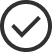

In [27]:
soup

In [30]:
# 获取 citation_author
authors = [meta['content'] for meta in soup.find_all('meta', {'name': 'citation_author'})]

# 获取 citation_author_institution
author_institutions = [meta['content'] for meta in soup.find_all('meta', {'name': 'citation_author_institution'})]

# 获取 citation_publication_date
publication_date = soup.find('meta', {'name': 'citation_publication_date'})['content'] if soup.find('meta', {'name': 'citation_publication_date'}) else None

# 获取 citation_title
title = soup.find('meta', {'name': 'citation_title'})['content'] if soup.find('meta', {'name': 'citation_title'}) else None

# 打印结果
print('Authors:', authors)
print('Author Institutions:', author_institutions)
print('Publication Date:', publication_date)
print('Title:', title)

Authors: ['Alessandro Bonatti', 'Matthew Mitchell']
Author Institutions: []
Publication Date: 2021/12/01
Title: Introduction to the Symposium on Contracts, Organizations, and Ownership


In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv("publications.csv",index_col=0)

In [6]:
df.head()

,Authors,Title,Affiliations,Published Date,Journal Name,Subjects,Volume,Issue,DOI,URL
0,Alessandro Bonatti; Matthew Mitchell,"Introduction to the Symposium on Contracts, Or...",NaN,2022-2-2,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",69.0,4,10.1111/joie.12281,http://dx.doi.org/10.1111/joie.12281
1,Ricardo Cabral; Michael J. Leiblein,Adoption of a Process Innovation with Learning...,NaN,2003-3-27,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",49.0,3,10.1111/1467-6451.00149,http://dx.doi.org/10.1111/1467-6451.00149
2,David Bardey; Denis Gromb; David Martimort; Jé...,Controlling Sellers Who Provide Advice: Regula...,Department of Economics (CEDE) University of L...,2020-9-7,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68.0,3,10.1111/joie.12228,http://dx.doi.org/10.1111/joie.12228
3,Marius Schwartz; Daniel R. Vincent,Platform Competition With Cash‐Back Rebates Un...,Department of Economics Georgetown University ...,2020-7-29,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68.0,2,10.1111/joie.12210,http://dx.doi.org/10.1111/joie.12210
4,Paolo Buccirossi,A Search Model Where Consumers Choose Quantity...,NaN,NaN,Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",51.0,4,10.1111/j.0022-1821.2003.00208.x,http://dx.doi.org/10.1111/j.0022-1821.2003.002...


In [7]:
print('Authors:', authors)
print('Author Institutions:', author_institutions)
print('Publication Date:', publication_date)
print('Title:', title)

Authors: ['Ricardo Cabral', 'Michael J. Leiblein']
Author Institutions: ['Siemens AG, ICM CA CV B14, Otto-Hahn-Ring 6, D-81739 Munich, Germany,', 'Fisher College of Business, The Ohio State University, Columbus']
Publication Date: 2001/09/01
Title: Adoption of a Process Innovation with Learning-by-Doing: Evidence from the Semiconductor Industry


In [8]:
# 将作者和机构列表转换为字符串，以便将它们保存在 CSV 文件中
authors_str = '; '.join(authors)
author_institutions_str = '; '.join(author_institutions)

doi_url = 'http://dx.doi.org/10.1111/1467-6451.00149'

# 查找要更新的行
index = df[df['URL'] == doi_url].index[0]

# 更新行
df.loc[index, 'Authors'] = authors_str
df.loc[index, 'Affiliations'] = author_institutions_str
df.loc[index, 'Published Date'] = publication_date
df.loc[index, 'Title'] = title
# 保存更新后的 CSV
df.to_csv('jouranl of industrial economics.csv',index=True)







In [23]:
df[df['URL'] == doi_url].index[0]

1

In [28]:
df.loc[index, 'Affiliations'] = author_institutions_str

In [37]:
df.to_csv('jouranl of industrial economics.csv',index=True)

In [9]:
df

,Authors,Title,Affiliations,Published Date,Journal Name,Subjects,Volume,Issue,DOI,URL
0,Alessandro Bonatti; Matthew Mitchell,"Introduction to the Symposium on Contracts, Or...",NaN,2022-2-2,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",69.0,4,10.1111/joie.12281,http://dx.doi.org/10.1111/joie.12281
1,Ricardo Cabral; Michael J. Leiblein,Adoption of a Process Innovation with Learning...,"Siemens AG, ICM CA CV B14, Otto-Hahn-Ring 6, D...",2001/09/01,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",49.0,3,10.1111/1467-6451.00149,http://dx.doi.org/10.1111/1467-6451.00149
2,David Bardey; Denis Gromb; David Martimort; Jé...,Controlling Sellers Who Provide Advice: Regula...,Department of Economics (CEDE) University of L...,2020-9-7,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68.0,3,10.1111/joie.12228,http://dx.doi.org/10.1111/joie.12228
3,Marius Schwartz; Daniel R. Vincent,Platform Competition With Cash‐Back Rebates Un...,Department of Economics Georgetown University ...,2020-7-29,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",68.0,2,10.1111/joie.12210,http://dx.doi.org/10.1111/joie.12210
4,Paolo Buccirossi,A Search Model Where Consumers Choose Quantity...,NaN,NaN,Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",51.0,4,10.1111/j.0022-1821.2003.00208.x,http://dx.doi.org/10.1111/j.0022-1821.2003.002...
...,...,...,...,...,...,...,...,...,...,...
729,Yiyi Zhou; Shanjun Li,Technology Adoption and Critical Mass: The Cas...,Department of Economics and College of Busines...,2018-10-30,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",66.0,2,10.1111/joie.12176,http://dx.doi.org/10.1111/joie.12176
730,Daniel Bennett; Che‐Lun Hung; Tsai‐Ling Lauder...,Health Care Competition and Antibiotic Use in ...,Harris School of Public Policy Studies Univers...,2015-6-15,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",63.0,2,10.1111/joie.12075,http://dx.doi.org/10.1111/joie.12075
731,David Lucking-Reiley,Auctions on the Internet: What’s Being Auction...,NaN,2003-3-27,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",48.0,3,10.1111/1467-6451.00122,http://dx.doi.org/10.1111/1467-6451.00122
732,Gaétan De Rassenfosse; Paul H. Jensen; T'Mir J...,Is the Patent System an Even Playing Field? Th...,Ecole Polytechnique Fédérale de Lausanne Laus...,2023-4-5,The Journal of Industrial Economics,"Economics and Econometrics; General Business, ...",71.0,1,10.1111/joie.12319,http://dx.doi.org/10.1111/joie.12319
